## Statistical Hypothesis Testing

### Null Hypothesis

Let's review Null Hypothesis from earlier. Someone says they can predict coin tosses. We toss a coin 100 times and see how many they right. Say they get 57. We check the probability of a neutral coin giving us 57.

In [1]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

from scipy.stats import binom
1 - binom.cdf(57, 100, 0.5)

0.066605309603606777

This result at over 6% is within our pre-defined 95 percentile. So we reject the claim and say the person has no ability. 

---

### A More Specific Claim

So far so good. What if the person said, "I'm not perfect, but I can predict coin tosses 60% of the time. Which is still good, which is still valuable."

What do we do in this case. Sure, we can do exactly what we did earlier and when she predict 57 times, we can reject her claim.

But what if she says, "Wait a minute. I said 60 and I got 57, that sounds pretty good to me."

What do we say to that? The issue here is that, there is no longer a single Null Hypothesis, that we prove or disprove. But two competing hypothesis. A -> there is no predictive power. B -> there is a 60% predictive power.

Each is a normal curve, one centered at 50% and the other at 60%.

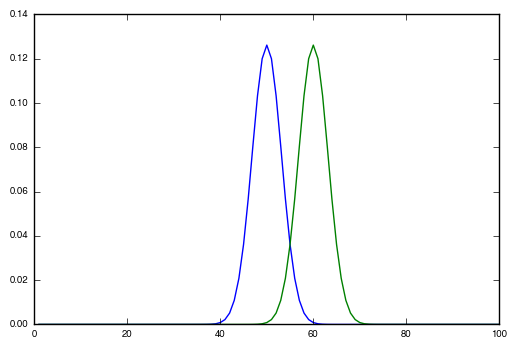

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%matplotlib inline

mu = 50
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()

**And 57 correct guesses fall within the 95% of both the curves:**

In [3]:
print (1 - binom.cdf(57, 100, 0.5))
print (binom.cdf(57, 100, 0.6))

0.0666053096036
0.303260129843


What now? There just isn't enough data to achieve a confidence of 95%. There are few things we can do.

### 1) Decrease confidence


Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if she can predict over 55, then she has predictive power. This would mean that we have decreased our confidence level.

In [4]:
print (1 - binom.cdf(55, 100, 0.5))
print (binom.cdf(54, 100, 0.6))

0.135626512037
0.13109045262


** At 87% percent confidence level, we can say that the person has some predictive power, since she got 57 tosses correct.**

### 2) Be Biased

But it is not neccessary that we bias the two hypothesis equally and pick the midpoint the way we did. The cut-off point can be anywhere. Currently, our error margins are even. The chance that someone has predictive power and we say no is 13% and the chance that someone has no power and we say they do is also 13%. As we change the cutoff, one error goes down and the other goes way up.

For example, if we stuck with the original 95% on a coin being fair:

In [5]:
binom.ppf(0.95, 100, 0.5)

58.0

Then our cutff is 58. Our two errors will be:

In [6]:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

0.044313040057
0.377467323878


5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. Which depending on the problem might be exactly what we want. These two types are errors are called Type I and Type II. And we have the choice of baising against one or the other. 

### 3) Increase Sample Size

The best senario though is to increase the sample size. Imagine what happens if instead of 100, we did 1000 tosses.

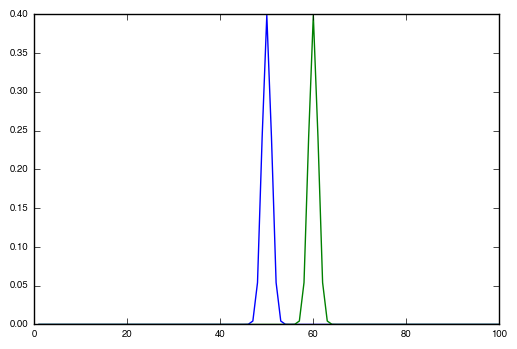

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
%matplotlib inline

mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()

The two normal curves are completely seperated now.

In [8]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0


In [9]:
print (1-binom.cdf(550, 1000, 0.5))
print (binom.cdf(550, 1000, 0.6))

0.000695870797211
0.000741202899006


**With a cutoff of 550, both our errors come down to under 0.1%.**